# Tutorial de Ciencia de Datos (CC408) 2024
## Tutorial 12 - CART: Árboles de regresión y clasificación 

**Objetivo:**  
Que se familiaricen con los arboles de decisión para regresión y clasificación

### Temario:
- Árbol de decisión y clasificación
- Ejemplo práctico con base de Titanic: https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

## ¿Qué es un árbol de decisiones? ¿Cómo funciona?
El árbol de decisiones es un tipo de algoritmo de **aprendizaje supervisado** (que tiene una variable objetivo predefinida) que se utiliza para problemas de **clasificación y de regresión**. Funciona para variables tanto categóricas como continuas. 

En esta técnica, el objetivo es dividir a la población o muestra en dos o más conjuntos (o subpoblaciones) homogéneos en función del atributo más significativo en las variables x. Entonces la pureza del nodo aumenta con respecto a la variable objetivo. El árbol de decisión divide los nodos en todas las variables disponibles y luego selecciona la división que da como resultado los subnodos más homogéneos.

### Tipos de árboles de decisión
Los tipos de árbol de decisión se basan en el tipo de variable objetivo que tenemos. Puede ser de dos tipos:

**1. Árbol de decisión de variable categórica:** Árbol de decisión que tiene una variable de destino categórica y luego se llama como árbol de decisión de variable categórica. Ejemplo: Titanic

**2. Árbol de decisión de variable continua:** El árbol de decisión tiene una variable de destino continua, por lo que se denomina Árbol de decisión de variable continua. Ejemplo: Hitters


### Terminología importante relacionada con los árboles de decisión
Veamos la terminología básica utilizada con los árboles de decisión:

**1.Nodo Base/Raíz (RootNode):** Es el primer nodo. Representa la muestra completa y esto se divide en dos o más conjuntos homogéneos.

**2.Dividir (Splitting):** Es un proceso de dividir un nodo en dos o más subnodos.

**3.Nodo interno o nodo de decisión (Decision Node):** Cuando un subnodo se divide en otros subnodos, se denomina nodo interno o nodo de decisión.

**4. Nodo Terminal/Hojas:** Los nodos que no se dividen se denominan Hoja o nodo Terminal.

**5.Poda (Pruning):** Cuando eliminamos subnodos de un nodo de decisión, este proceso se llama poda. Es decir, el proceso opuesto de la división.

**6 Rama/Subárbol:** Una subsección de todo el árbol se llama rama o subárbol.

**7.Nodo padre e hijo:** Un nodo, que se divide en subnodos, se denomina nodo padre de subnodos, donde los subnodos son los hijos del nodo padre.

En el ejemplo de la base Hitters

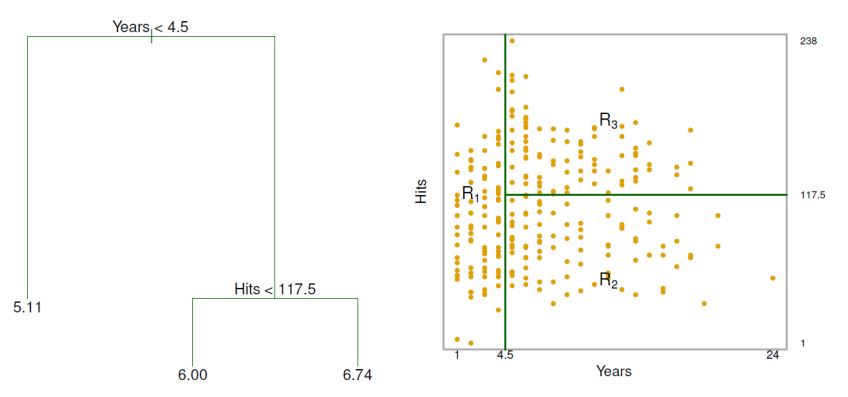


## Ventajas
* **No lineal:** Los árboles son una forma inteligente de representar las no linealidades

* **Fácil de entender y comunicar:** La salida del árbol de decisiones es muy fácil de entender. No requiere ningún conocimiento estadístico.

* **Útil en la exploración de datos:** es la forma más rápida de identificar variables significativas (las de los nodos de más arriba). Con los árboles de decisión podemos crear nuevas variables/ características que tienen mejor poder para predecir la variable objetivo.

* **El tipo de datos no es una restricción:** Puede manejar variables tanto numéricas como categóricas

## Desventajas

* **Ajuste excesivo:** El ajuste excesivo es una de las dificultades más prácticas para el modelo de árbol de decisión. Este problema se resuelve estableciendo restricciones en los parámetros del modelo.

* **Estructura lineal:** Cuando la estructura de los datos es lineal, el arbol no anda bien, porque las variables importan siempre y con cart solo algunas variables importan en cada nodo. 

* **Poco robusto:** Cambios en la base puede generar grandes cambios en el arbol resultante

## Ejercicio: Árbol de decisiones sobre datos del Titanic
En este ejercicio veremos los árboles de decisión utilizando el conjunto de datos Titanic:
1. Aprender a predecir a los sobrevivientes con árboles de decisión
2. Exploración y procesamiento de conjuntos de datos
3. Funciones relevantes para los árboles de decisión
4. Impureza de Gini
5. Encontrar la mejor profundidad de árbol con la ayuda de la validación cruzada
6. Generación y visualización del modelo final


|Variable|Definition|Key|
| --- | --- | --- |
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex||
|Age|Age in years||
|Sibsp|| # of siblings / spouses aboard the Titanic	
|Parch|| # of parents / children aboard the Titanic	
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


Fuente: [Kaggle](https://www.kaggle.com/c/titanic/data)

### Limpieza de la base de datos del Titanic 

In [130]:
# (Si aún no instalaron alguna librería recuerden primero hacer ese paso)
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score

In [131]:
# Cargamos los datos 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Guardamos el ID de los pasajeros del grupo a predecir 
passenger_id = test['PassengerId']

original_train = train.copy()

# Info del df
print(train.info())
#print(test.info())
# Miramos las primeras filas del df
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A continuación queremos generar una función que nos extraiga el título de la persona. Por ejemplo, el título de `Braund, Mr. Owen Harris` sería `Mr`.

In [132]:
# Definir función para extraer los 'titles' de los nombres de los pasajeros
def get_title(name):
    '''
    input: nombres de los pasajeros, incluyendo el title
    return: title
    '''
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

La función anterior usa algo que se llaman expresiones regulares para buscar texto. El uso de expresiones regulares es algo que solía ser bastante complicado y requerir bastante estudio, pero ahora, con la ayuda de los LLMs, la cosa se hizo mucho más fácil. Por ejemplo: Si están usando VSCode usen _Generate_ de copilot con un prompt que diga algo como "create a function, called get_title, that extracts the word right before the first dot in a string".

In [133]:
# Ejemplo
get_title(train.Name[0])

'Mr'

In [134]:
train.Name[0]

'Braund, Mr. Owen Harris'

A continuación vamos a crear nuevas columnas con el dataset que contengan información relevante (lo pueden ver en detalle en sus casas).

Vamos a hacer varias cosas:
* Calcular el tamaño de la familia.
* Crear una nueva columna llamada `Has_cabin` que tiene un 0 si `Cabin` es `NaN` y un 1 si no.
* Completar los _missing values_ de `Embarked` con `S` (el valor más común).
* Completar los _missing values_ de `Fare` con su mediana.
* Completar los _missing values_ de `Age` con un valor aleatorio entre la media +/- 1 SD.
* Obtener el título y reemplazar los raros (como `Countess`) por `Rare`.
* Convertir la variable `Age` en numérica.
* Generar dummies para `Title` y `Embarked`.

In [135]:
dummies_train_df = []
dummies_test_df = []

for dataset in [train, test]:
    # Tamaño de la familia
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
    # Viaja solo?
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1
    # Tiene cabina?
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    # Reemplazamos los missings en Embarked con la opción más común #train.groupby(['Embarked']).count()
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    # Reemplazamos los missings en Fare con la mediana
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
    # Imputamos los nulls en la edad con valores aleatorios entre la media +- 1 SD
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    # Nueva columna con titles
    dataset['Title'] = dataset['Name'].apply(get_title)
    # Agrupamos los títulos menos comunes
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                                'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Mr') 
   
    # Convertimos Sex en numerica
    dataset['Male'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    if dataset is train:
        # Convertimos Title en dummies  
        titles_train = pd.get_dummies(train['Title'], drop_first=True)
        dummies_train_df.append(titles_train)
        # Convertimos Embarked en dummies
        embarked_train = pd.get_dummies(train['Embarked'], drop_first=True)
        dummies_train_df.append(embarked_train)
    else:
        # Convertimos Title en dummies    
        titles_test = pd.get_dummies(test['Title'], drop_first=True)
        dummies_test_df.append(titles_test)
        # Convertimos Embarked en dummies        
        embarked_test = pd.get_dummies(test['Embarked'], drop_first=True)
        dummies_test_df.append(embarked_test)

In [136]:
dummies_train_df

[      Miss     Mr    Mrs   Rare
 0    False   True  False  False
 1    False  False   True  False
 2     True  False  False  False
 3    False  False   True  False
 4    False   True  False  False
 ..     ...    ...    ...    ...
 886  False  False  False   True
 887   True  False  False  False
 888   True  False  False  False
 889  False   True  False  False
 890  False   True  False  False
 
 [891 rows x 4 columns],
          Q      S
 0    False   True
 1    False  False
 2    False   True
 3    False   True
 4    False   True
 ..     ...    ...
 886  False   True
 887  False   True
 888  False   True
 889  False  False
 890   True  False
 
 [891 rows x 2 columns]]

Eliminamos variables irrelevantes y unimos con las tablas de dummies

In [137]:
# Decidí eliminar 'Mr' porque en el heatmap observé que estaba altísimamente correlacionado con sexo.
drop_elements = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Parch', 'SibSp', 'Embarked', 'Title']

train = pd.concat([train, dummies_train_df[0], dummies_train_df[1]], axis=1)
train = train.drop(drop_elements, axis = 1)
train.columns = train.columns.str.lower()

test = pd.concat([test, dummies_test_df[0], dummies_test_df[1]], axis=1)
test = test.drop(drop_elements, axis = 1)
test.columns = test.columns.str.lower()

train.head(5)

,survived,pclass,age,fare,family_size,alone,has_cabin,male,miss,mr,mrs,rare,q,s
0,0,3,22,7.2500,2,0,0,1,False,True,False,False,False,True
1,1,1,38,71.2833,2,0,1,0,False,False,True,False,False,False
2,1,3,26,7.9250,1,1,0,0,True,False,False,False,False,True
3,1,1,35,53.1000,2,0,1,0,False,False,True,False,False,True
4,0,3,35,8.0500,1,1,0,1,False,True,False,False,False,True


In [138]:
test.head()

,pclass,age,fare,family_size,alone,has_cabin,male,miss,mr,mrs,rare,q,s
0,3,34,7.8292,1,1,0,1,False,True,False,False,True,False
1,3,47,7.0000,2,0,0,0,False,False,True,False,False,True
2,2,62,9.6875,1,1,0,1,False,True,False,False,True,False
3,3,27,8.6625,1,1,0,1,False,True,False,False,False,True
4,3,22,12.2875,3,0,0,0,False,False,True,False,False,True


Probamos que no hayan quedado missing values:

In [139]:
# Probamos que no hayan quedado missing values:
columns_with_nan = train.columns[train.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)
columns_with_nan = test.columns[test.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []
Columns with NaN values: []


## Visualización de la base procesada

### Heatmap
Este mapa de calor es muy útil como observación inicial porque permite hacerse una idea del valor predictivo de cada feature. El valor del mapa de calor se sitúa entre (-1,0) y (0,1). A medida que aumenta el valor (en términos absolutos), aumenta la correlación entre los atributos.

<Axes: title={'center': 'Correlacion de Pearson entre las Xs'}>

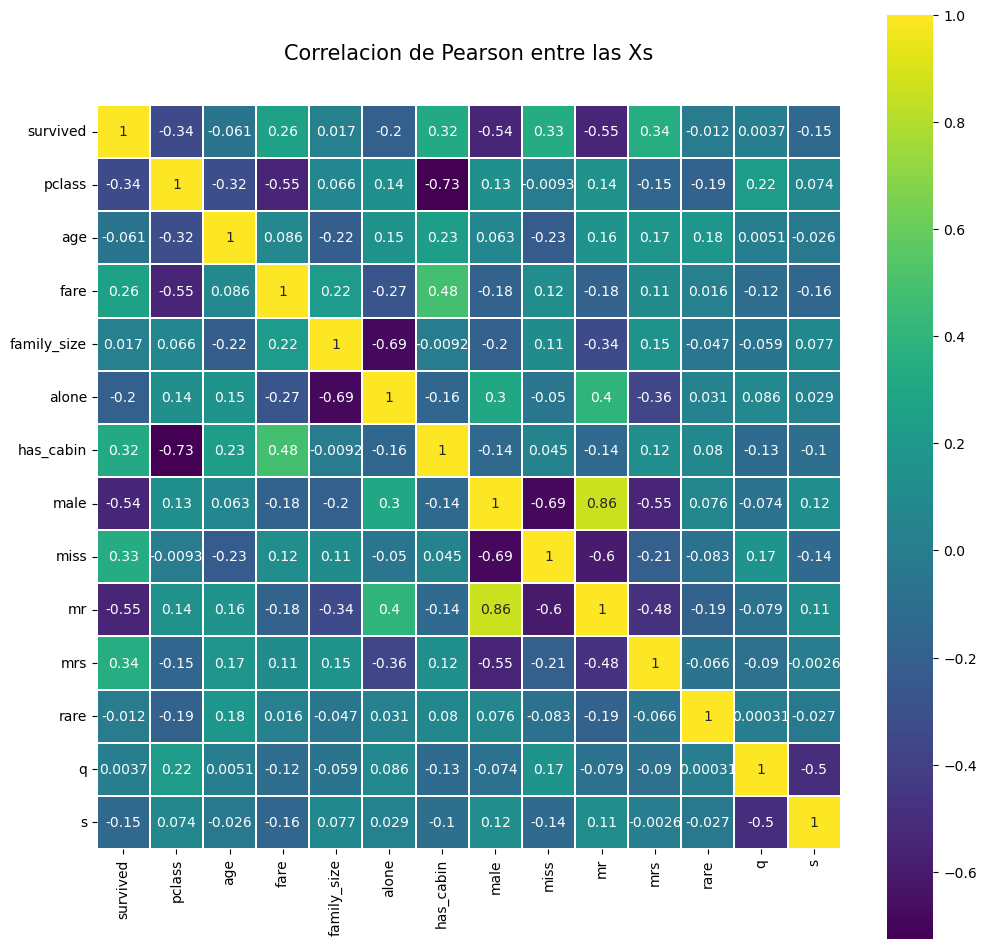

In [140]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlacion de Pearson entre las Xs', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

### ¿Cómo decide un árbol dónde dividirse?
Los árboles de decisión utilizan distintos algoritmos para decidir cómo dividir un nodo en dos o más subnodos. La creación de subnodos aumenta la homogeneidad de los subnodos resultantes. En otras palabras, podemos decir que la pureza del nodo aumenta con respecto a la variable objetivo. El árbol divide los nodos en todas las variables disponibles y luego selecciona la división que da como resultado los subnodos más homogéneos.


#### Índice de Gini
El Gini da una medida de la impureza de un nodo. Se calcula como:

$Gini =  \sum \limits _{k=1} ^{K} \hat{p}_{mk} (1-\hat{p}_{mk}) $

donde $\hat{p}_{mk}$ es la proporción de observaciones que en el dataset de entrenamiento en la región m de la clase k. 

Por la forma en la que está construido este índice, su valor será menor cuando $\hat{p}_{mk}$ se acerque a 1 o a 0 (es decir, cuando las observaciones del nodo son más parecidas). Cuanto menor sea el valor de Gini, menor será la desigualdad. Los árboles de decisión intentarán encontrar la división que reduzca más la Impureza de Gini en los dos nodos resultantes.

In [141]:
# Definimos la función de la impureza de Gini 
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survived_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survived_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survived_prob + mislabelling_not_survived_prob
    return gini_impurity

In [142]:
train.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [143]:
# Gini Impurity en nodo inicial
survived = train.survived.value_counts()[1]
total = len(train)
gini_impurity_starting_node = get_gini_impurity(survived, total)
gini_impurity_starting_node

0.47301295786144265

A mano:

In [144]:
total = (549+342)
suma_k0 = 549/total * (1 - 549/total)
suma_k1 = 342/total * (1 - 342/total)
gini_a_mano = suma_k0 + suma_k1
gini_a_mano

0.4730129578614427

Veamos el promedio de los sobrevivientes entre hombres y mujeres:

In [145]:
original_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Sex  Survived           
               mean count  sum
0  female  0.742038   314  233
1    male  0.188908   577  109

In [146]:
# Gini Impurity si hicieramos la partición según sexo
gini_impurity_starting_node_male = get_gini_impurity(109, 577)
gini_impurity_starting_node_female = get_gini_impurity(233, 314)
print(gini_impurity_starting_node_male, gini_impurity_starting_node_female)

0.3064437162277843 0.3828350034484158


#### Árbol de decisión de clasificación

Para estimar el modelo vamos a usar [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de Scikit Learn

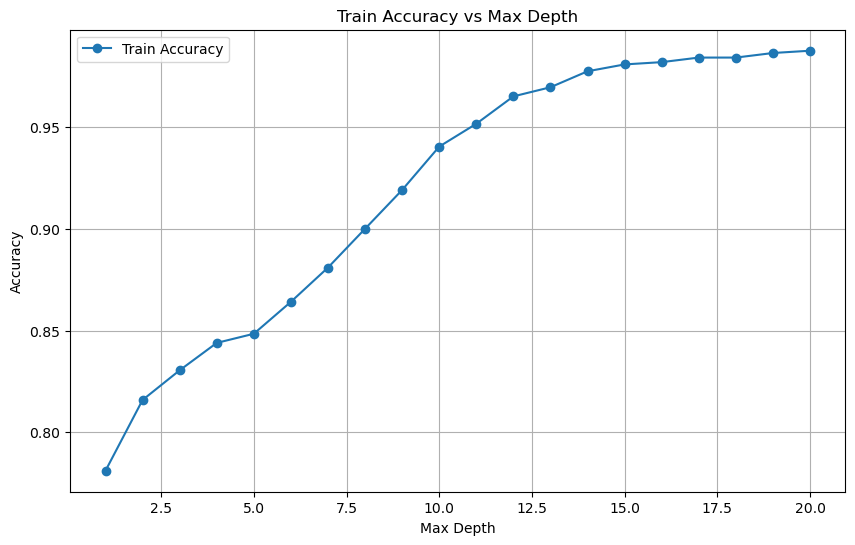

In [149]:
train_accuracies = []

X = train.drop(['survived'], axis=1)
y = train["survived"]       

depth_range = range(1, 21)  # You can adjust the range as needed

for depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    tree_model.fit(X, y)
    
    train_accuracy = tree_model.score(X, y)
    
    train_accuracies.append(train_accuracy)
    
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

Todo parece indicar que cuanto más profundidad tiene el árbol mejor. Miremos el árbol más grande que ajustamos:

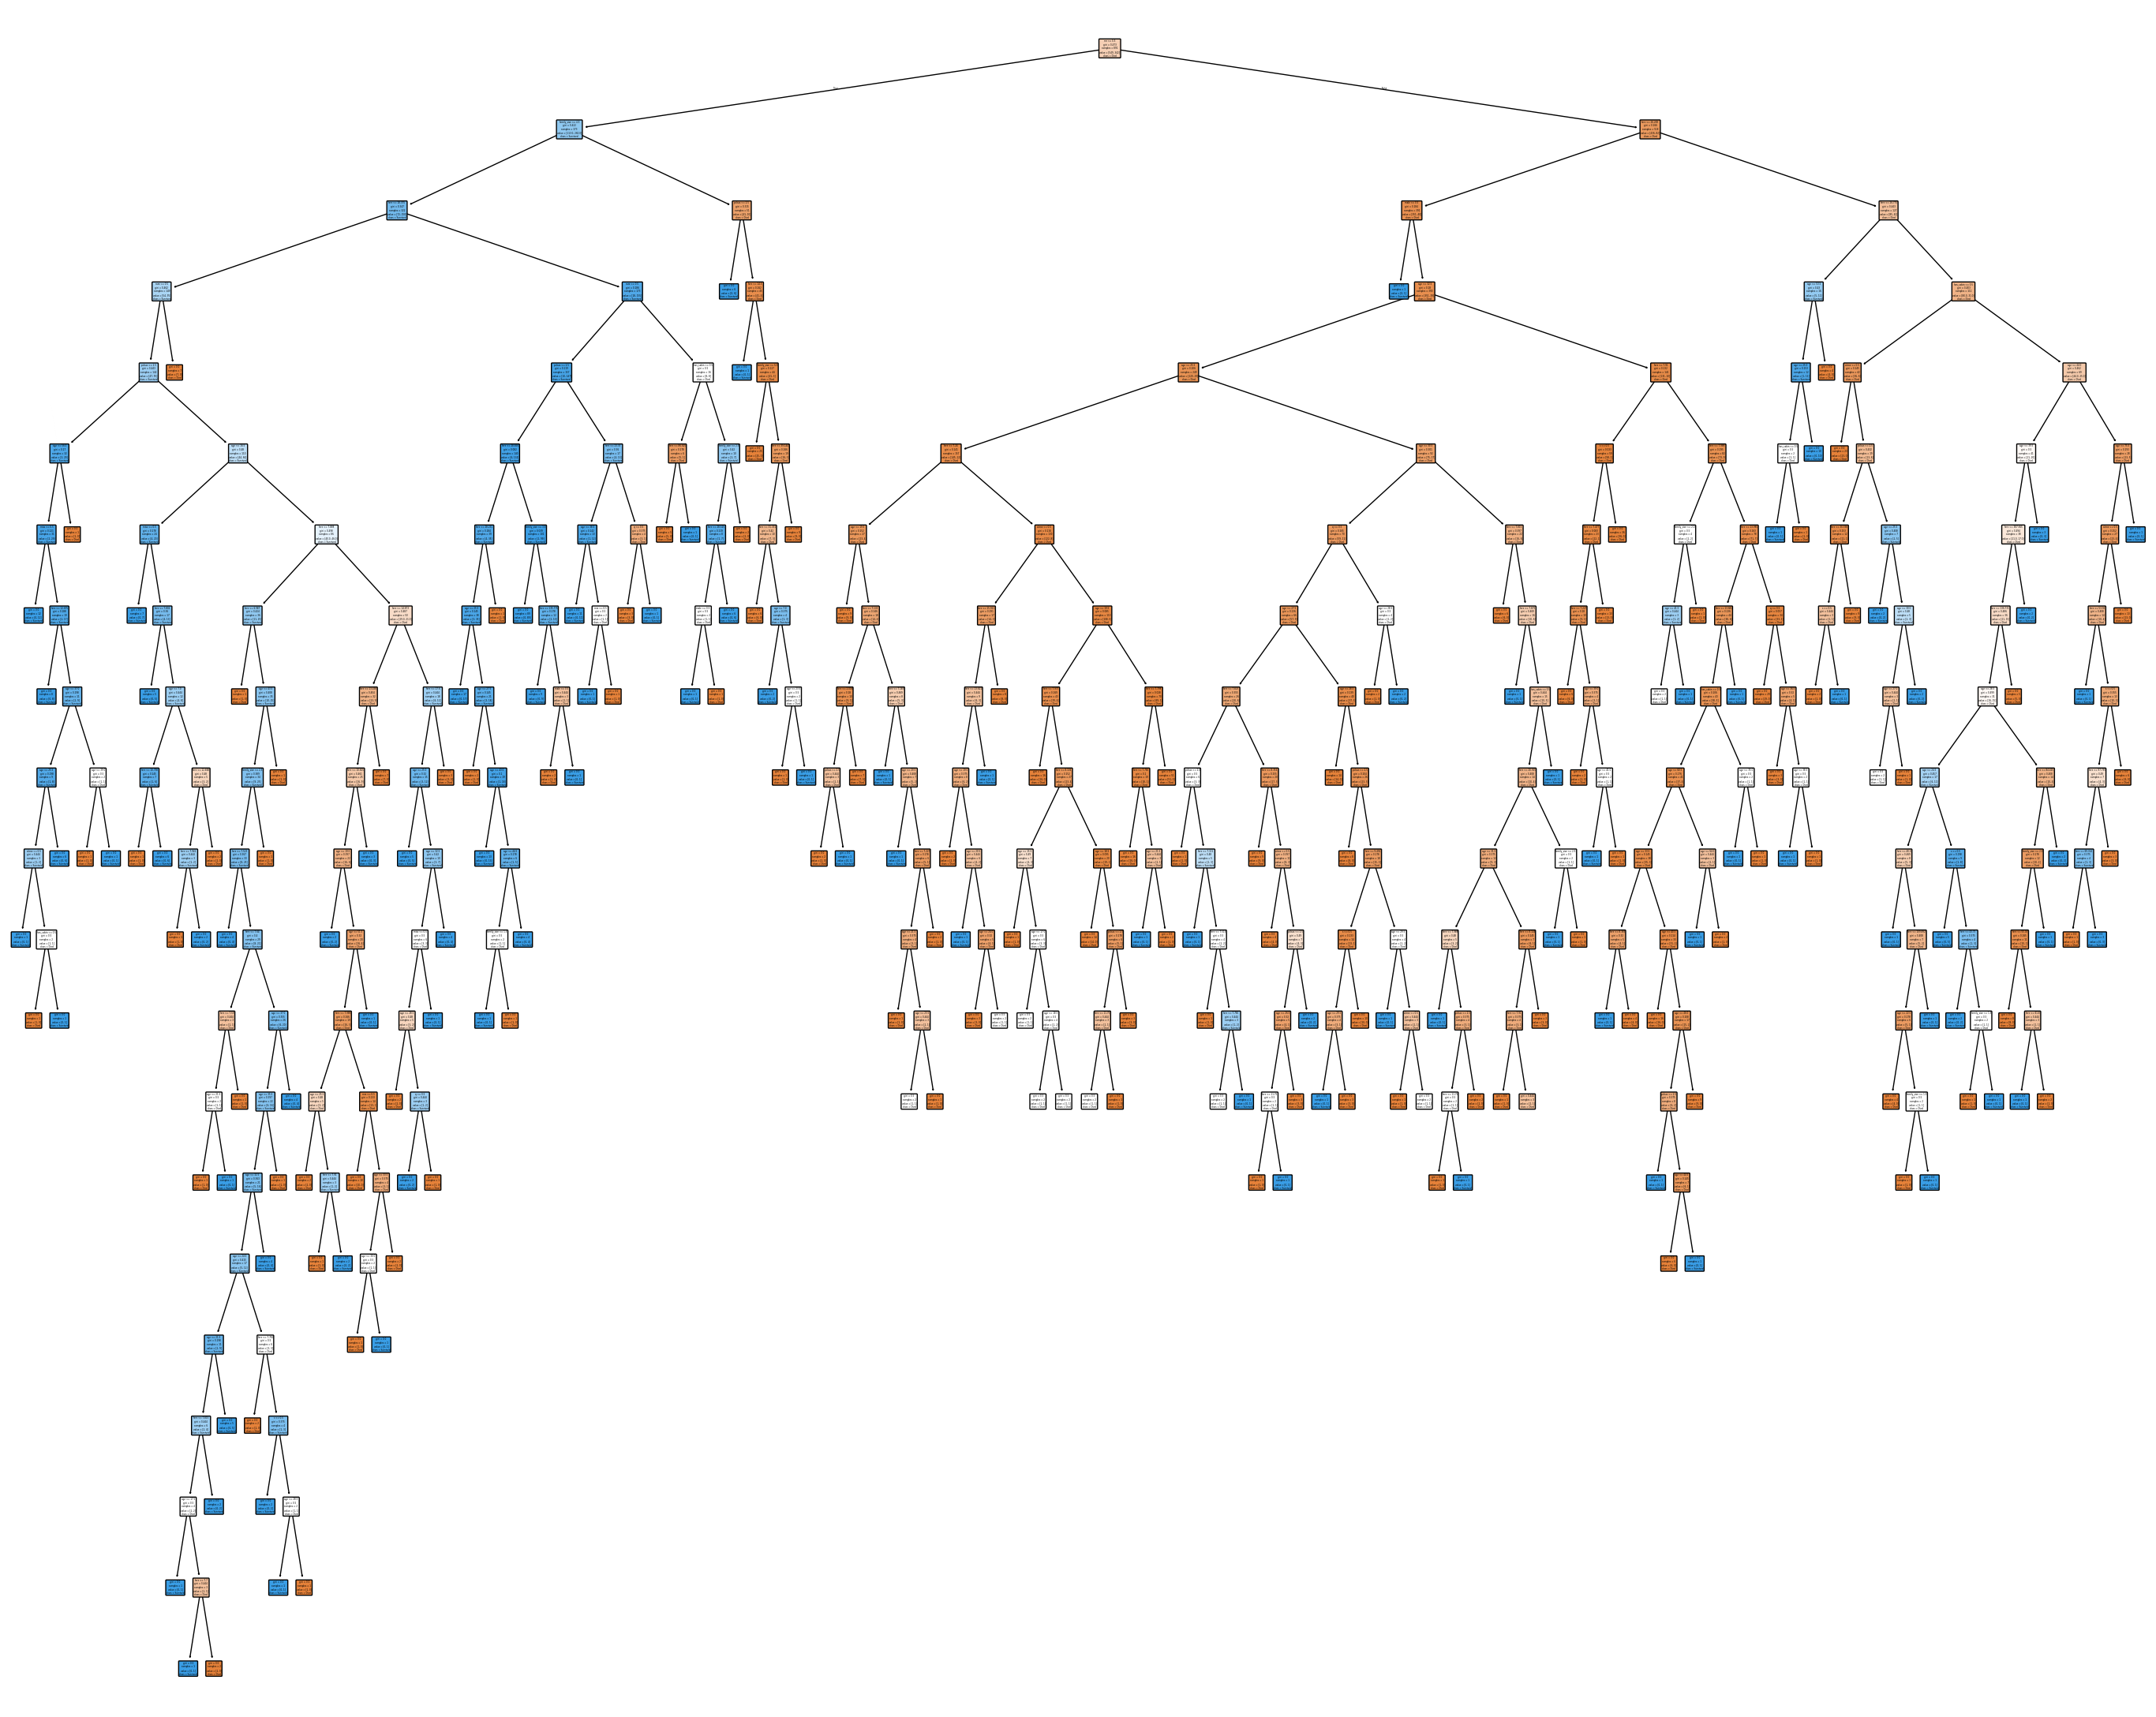

In [152]:
# Creamos un arbol con max_depth = 21
decision_tree = DecisionTreeClassifier(max_depth = 21).fit(X, y)

# Gráfico
fig = plt.figure(figsize=(35,28))
graph = plot_tree(decision_tree,
                  max_depth = 21,
                  impurity = True,   #mostrar impurity
                  feature_names = list(train.drop(['survived'], axis=1)),
                  class_names = ['Died', 'Survived'],
                  rounded = True, 
                  filled = True   #colorear los nodos p/ indicar la clase mayoritaria (p/ clasif.)
                 )
fig.savefig("Tree_titanic_21.pdf",bbox_inches='tight')

¿Qué creen que puede estar pasando?

Pues sí, estamos sobreajustando.

Para sacarnos de encima este problema usaremos CV para elegir el hiperparámetro de la profundidad del árbol (`max_depth`). Este hiperparámetro determina el número máximo de atributos que consideran para cada predicción (siendo el máximo la cantidad de características Xs disponibles en el dataset).

In [151]:
X = train.drop(['survived'], axis=1)
y = train["survived"]       

Hagamos k-fold cross-validation para encontrar el valor del hiperparámetro `max_depth`. Hagamos un loop sobre los _splits_ a mano:

In [161]:
cv = KFold(n_splits=10, shuffle = True, random_state=1)            
accuracies = []
max_attributes = len(test.columns)
depth_range = range(1, max_attributes + 1) # Recuerdan por qué +1?

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    
    for i, (train_index, valid_index) in enumerate(cv.split(X)):   
        x_train, x_valid = X.loc[train_index], X.loc[valid_index] 
        y_train, y_valid = y.loc[train_index], y.loc[valid_index] 
    
        model = tree_model.fit(x_train, y_train) 
        valid_acc = model.score(x_valid, y_valid)
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.768876
         2          0.769963
         3          0.816005
         4          0.818252
         5          0.800262
         6          0.804732
         7          0.791298
         8          0.800237
         9          0.773321
        10          0.782322
        11          0.772222
        12          0.767715
        13          0.775568


In [162]:
max_index = np.argmax(df['Average Accuracy'])
print("La mayor accuracy de cross validation es para max_depth " + str(max_index + 1) + ", y vale " + str(df['Average Accuracy'][max_index]))

La mayor accuracy de cross validation es para max_depth 4, y vale 0.8182521847690387


Podemos concluir que el hiperparámetro óptimo es max_depth=4. Estimamos el modelo final con ese hiperparámetro

Hagamos el mismo gridsearch pero con `GridSearchCV`:

In [159]:
tree_para = {'max_depth':depth_range, 'criterion':['gini']}
tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring='accuracy')
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 14)},
             scoring='accuracy')

In [160]:
print("Best Parameters:", tree_cv.best_params_)
print("Best Accuracy Score:", tree_cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Best Accuracy Score: 0.8229783950617284


Da diferente el valor de _accuracy_ de CV. Podemos cambiar el valor de `random_state` más arriba y ver cómo cambia justamente el valor de la _accuracy_.

Este tipo de selección del hiperparámetro que hace un árbol más chico puede considerarse una técnica de pre-prunning (diferente al prunning tradicional que aparece en el Tibshirani).

Ahora que ya tenemos el valor del hiperparámetro ajustemos un árbol con todos los datos de _train_.

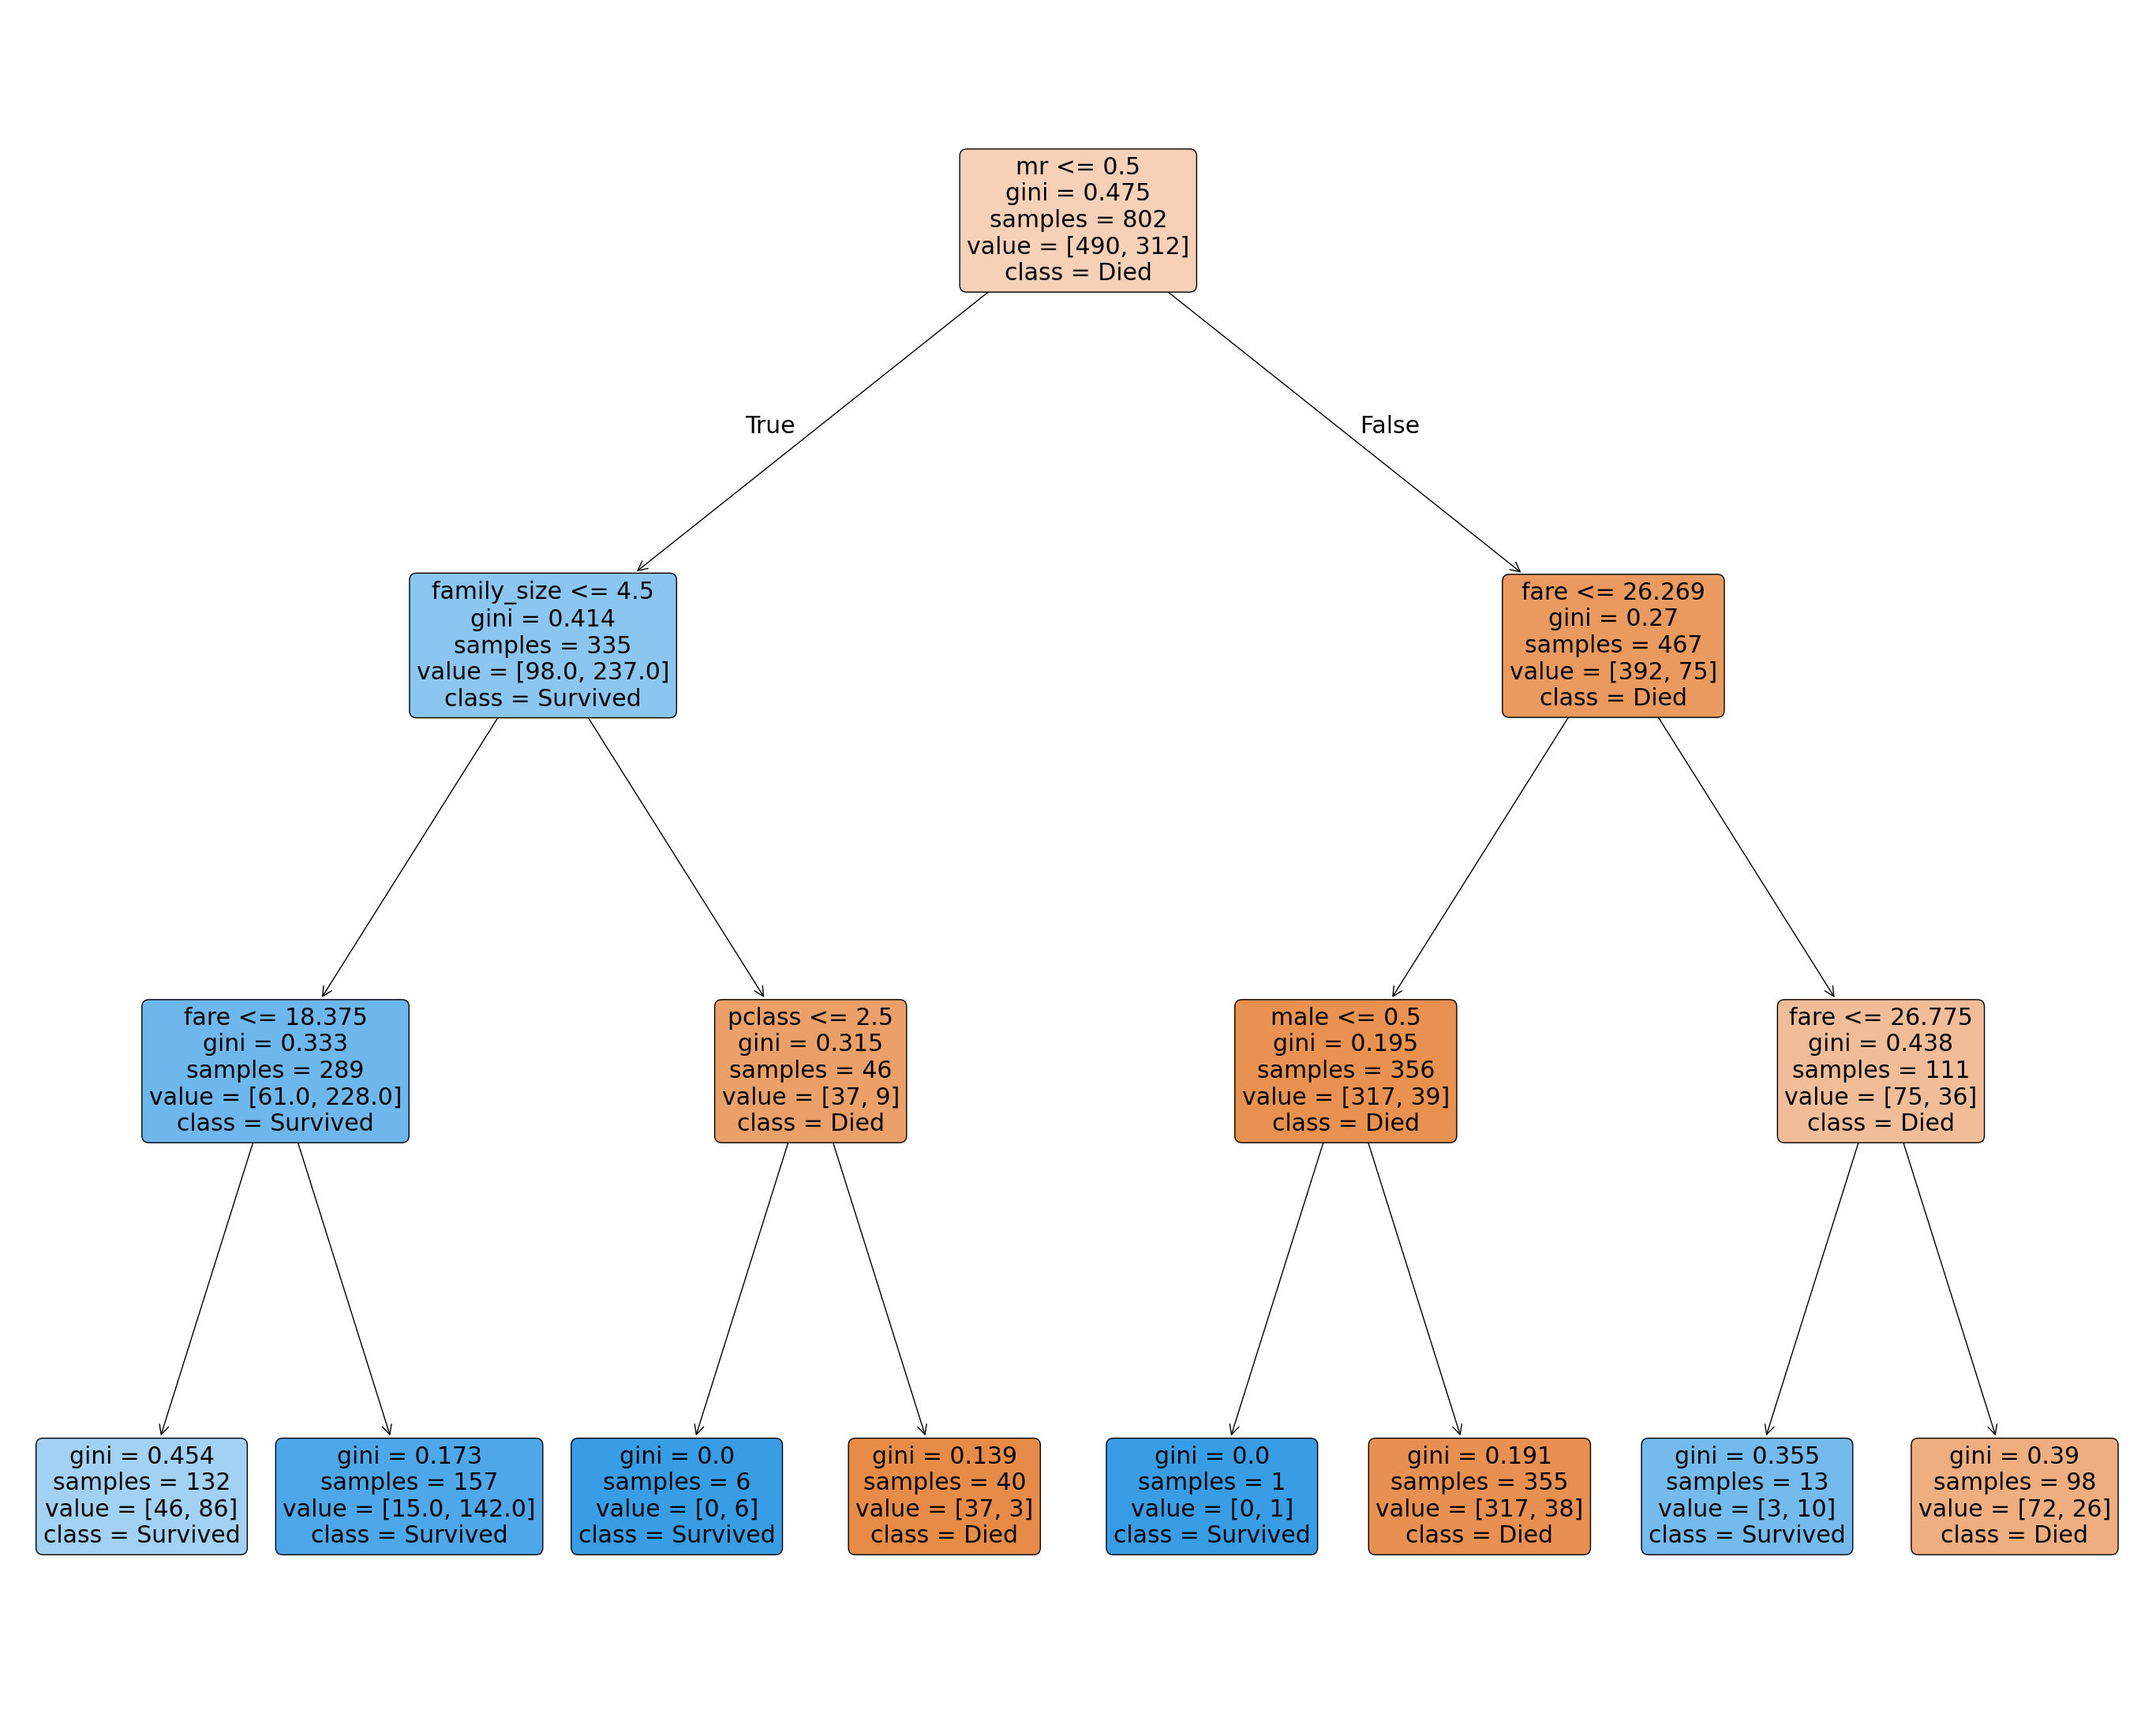

In [163]:
# Creamos un arbol con max_depth = 3
decision_tree = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

# Datos de test
test = test.dropna()  
X_test = test

# Gráfico
fig = plt.figure(figsize=(35,28))
graph = plot_tree(decision_tree,
                  max_depth = 3,
                  impurity = True,   #mostrar impurity
                  feature_names = list(train.drop(['survived'], axis=1)),
                  class_names = ['Died', 'Survived'],
                  rounded = True, 
                  filled = True   #colorear los nodos p/ indicar la clase mayoritaria (p/ clasif.)
                 )
fig.savefig("Tree_titanic.pdf",bbox_inches='tight')


En cada recuadro tenemos:
1. splitting condition
2. Gini impurity of the node
3. Samples: cantidad de observaciones en el nodo
4. Value: Cantidad de observaciones clasificadas como 'Died' y 'Survived'
5. Class: etiqueta de cada nodo, lo que clasificamos en c/u. 
El color representa la clase y la saturación aumenta a medida que el Gini es menor (mayor % de observaciones clasificadas igual).

Recordar: en un árbol de clasificación predecimos que una observación pertenece a la clase más recurrente dentro del nodo terminal al que pertenece (por ej., si para una observación determinada, la mayor parte de las observaciones del nodo al que pertenece son y=sobrevivió, para esa observación -y todas las de ese nodo- nuestra predicción será 'Sobrevivió')

In [165]:
acc_decision_tree = decision_tree.score(x_train, y_train)
acc_decision_tree

0.8366583541147132

Vamos a hacer la predicción sobre los datos de testeo. Acá deberíamos calcular la precisión del modelo final con la base de test. Pero como estamos trabajando con la base de datos de la competencia, la y_test no la hicieron pública. El resultado final a entregar era la predicción de sobrevivientes sobre los ID de los pasajeros. Es algo parecido a lo que hicieron en el inciso final del TP3.  

In [164]:
# Predicción sobre los datos de test
y_pred = decision_tree.predict(X_test)
submission = pd.DataFrame({"passengerId": passenger_id, "survived": y_pred})
submission.head()


,passengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Árboles de regresión

En este caso vamos a usar un árbol de regresión para predecir el salario de los jugadores de la MLB utilizando la, ya conocida, base de datos `Hitters`.

En este caso no se minimiza el Gini sino en MSE pesado. Es decir, si definimos MSE como:


$\text{MSE}(N) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$

Cuando se propone una división, se calcula el MSE ponderado de los nodos izquierdo y derecho resultantes, con el objetivo de minimizar este MSE ponderado. La fórmula para el MSE ponderado de una división es:

$\text{MSE}_{\text{split}} = \frac{n_L}{n} \cdot \text{MSE}(N_L) + \frac{n_R}{n} \cdot \text{MSE}(N_R)$

Donde $\text{MSE}(N_L)$ y $\text{MSE}(N_L)$ son los valores MSE de los nodos  izquierdo y derecho, calculados de forma similar al MSE de un único nodo. $n=n_L+n_R$ es la cantidad de observaciones del nodo padre que se divide en un nodo de $n_L$ observaciones y uno de $n_R$ observaciones.

Carguemos los datos y las librerías necesarias.


In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [167]:
hitters_data = pd.read_csv('Hitters.csv')

Cargamos los datos, los acomodamos y los separamos entre train y test:

In [168]:
# Nos sacamos de encima los missings values
hitters_data.dropna(inplace=True)

# Separamos en X e y
X = hitters_data.drop(['Salary'], axis=1)
y = hitters_data['Salary']

# Convertimos las variables categóricas en dummies (one hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Miremos si está todo bien
X_train.head()


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
177,177,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,False,False,False
184,184,586,159,12,72,79,53,9,3082,880,83,363,477,295,181,13,4,True,False,True
91,91,475,123,27,76,93,72,4,1810,471,108,292,343,267,226,10,6,True,False,True
3,3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,True,False,True
162,162,165,39,2,13,9,16,3,196,44,2,18,10,18,332,19,2,False,True,True


Ahora inicializamos el árbol de regresión:

In [169]:
tree_regressor = DecisionTreeRegressor(random_state=42)

Hagamos algo parecido a lo que hicimos antes pero con el RMSE. Veamos cómo varían los errores de train y test a medida que aumentamos la complejidad del modelo.

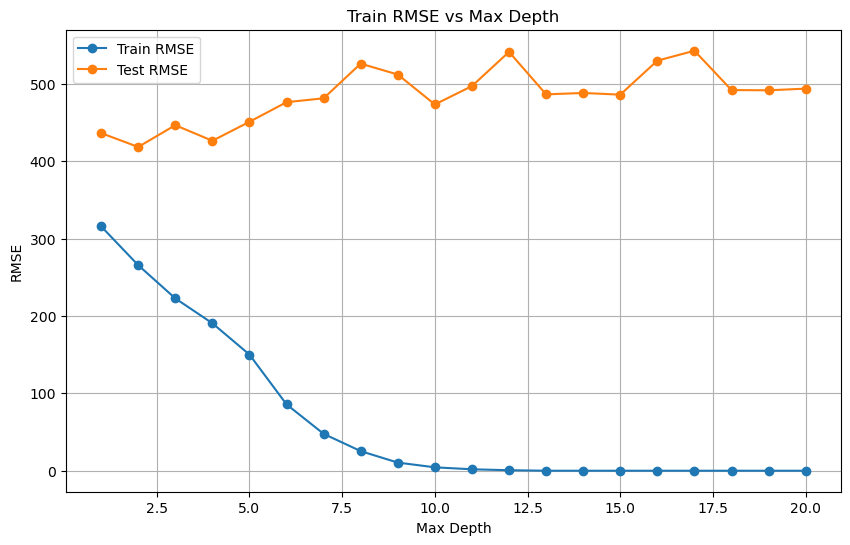

In [170]:
train_RMSE = []
test_RMSE = []

depth_range = range(1, 21)  # You can adjust the range as needed

for depth in depth_range:
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train, y_train)
    
    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_RMSE.append(train_rmse)
    test_RMSE.append(test_rmse)
    
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_RMSE, label='Train RMSE', marker='o')
plt.plot(depth_range, test_RMSE, label='Test RMSE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Train RMSE vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

De nuevo es una buena idea hacer cross-validation.

En este caso además de buscar el mejor valor de `max_depth`, vamos a hacer una grilla de búsqueda para otros hiperparámetros: `min_samples_split`, `min_samples_leaf` y `ccp_alpha`.

In [171]:
# Definimos un rango de valores para los hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]  # Cost Complexity Pruning parameter for post-pruning
}

# Usamos GridSearchCV para encontrar el mejor modelo
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Extraemos el mejor modelo
best_tree = grid_search.best_estimator_

# Hacemos predicciones para evaluar el modelo
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Mejores parámetros para el árbol de regresión: {grid_search.best_params_}")
print(f"MSE de train: {train_mse:.4f}")
print(f"MSE de test: {test_mse:.4f}")

Mejores parámetros para el árbol de regresión: {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
MSE de train: 48067.6133
MSE de test: 185035.5049


Veamos cómo se ve este árbol:

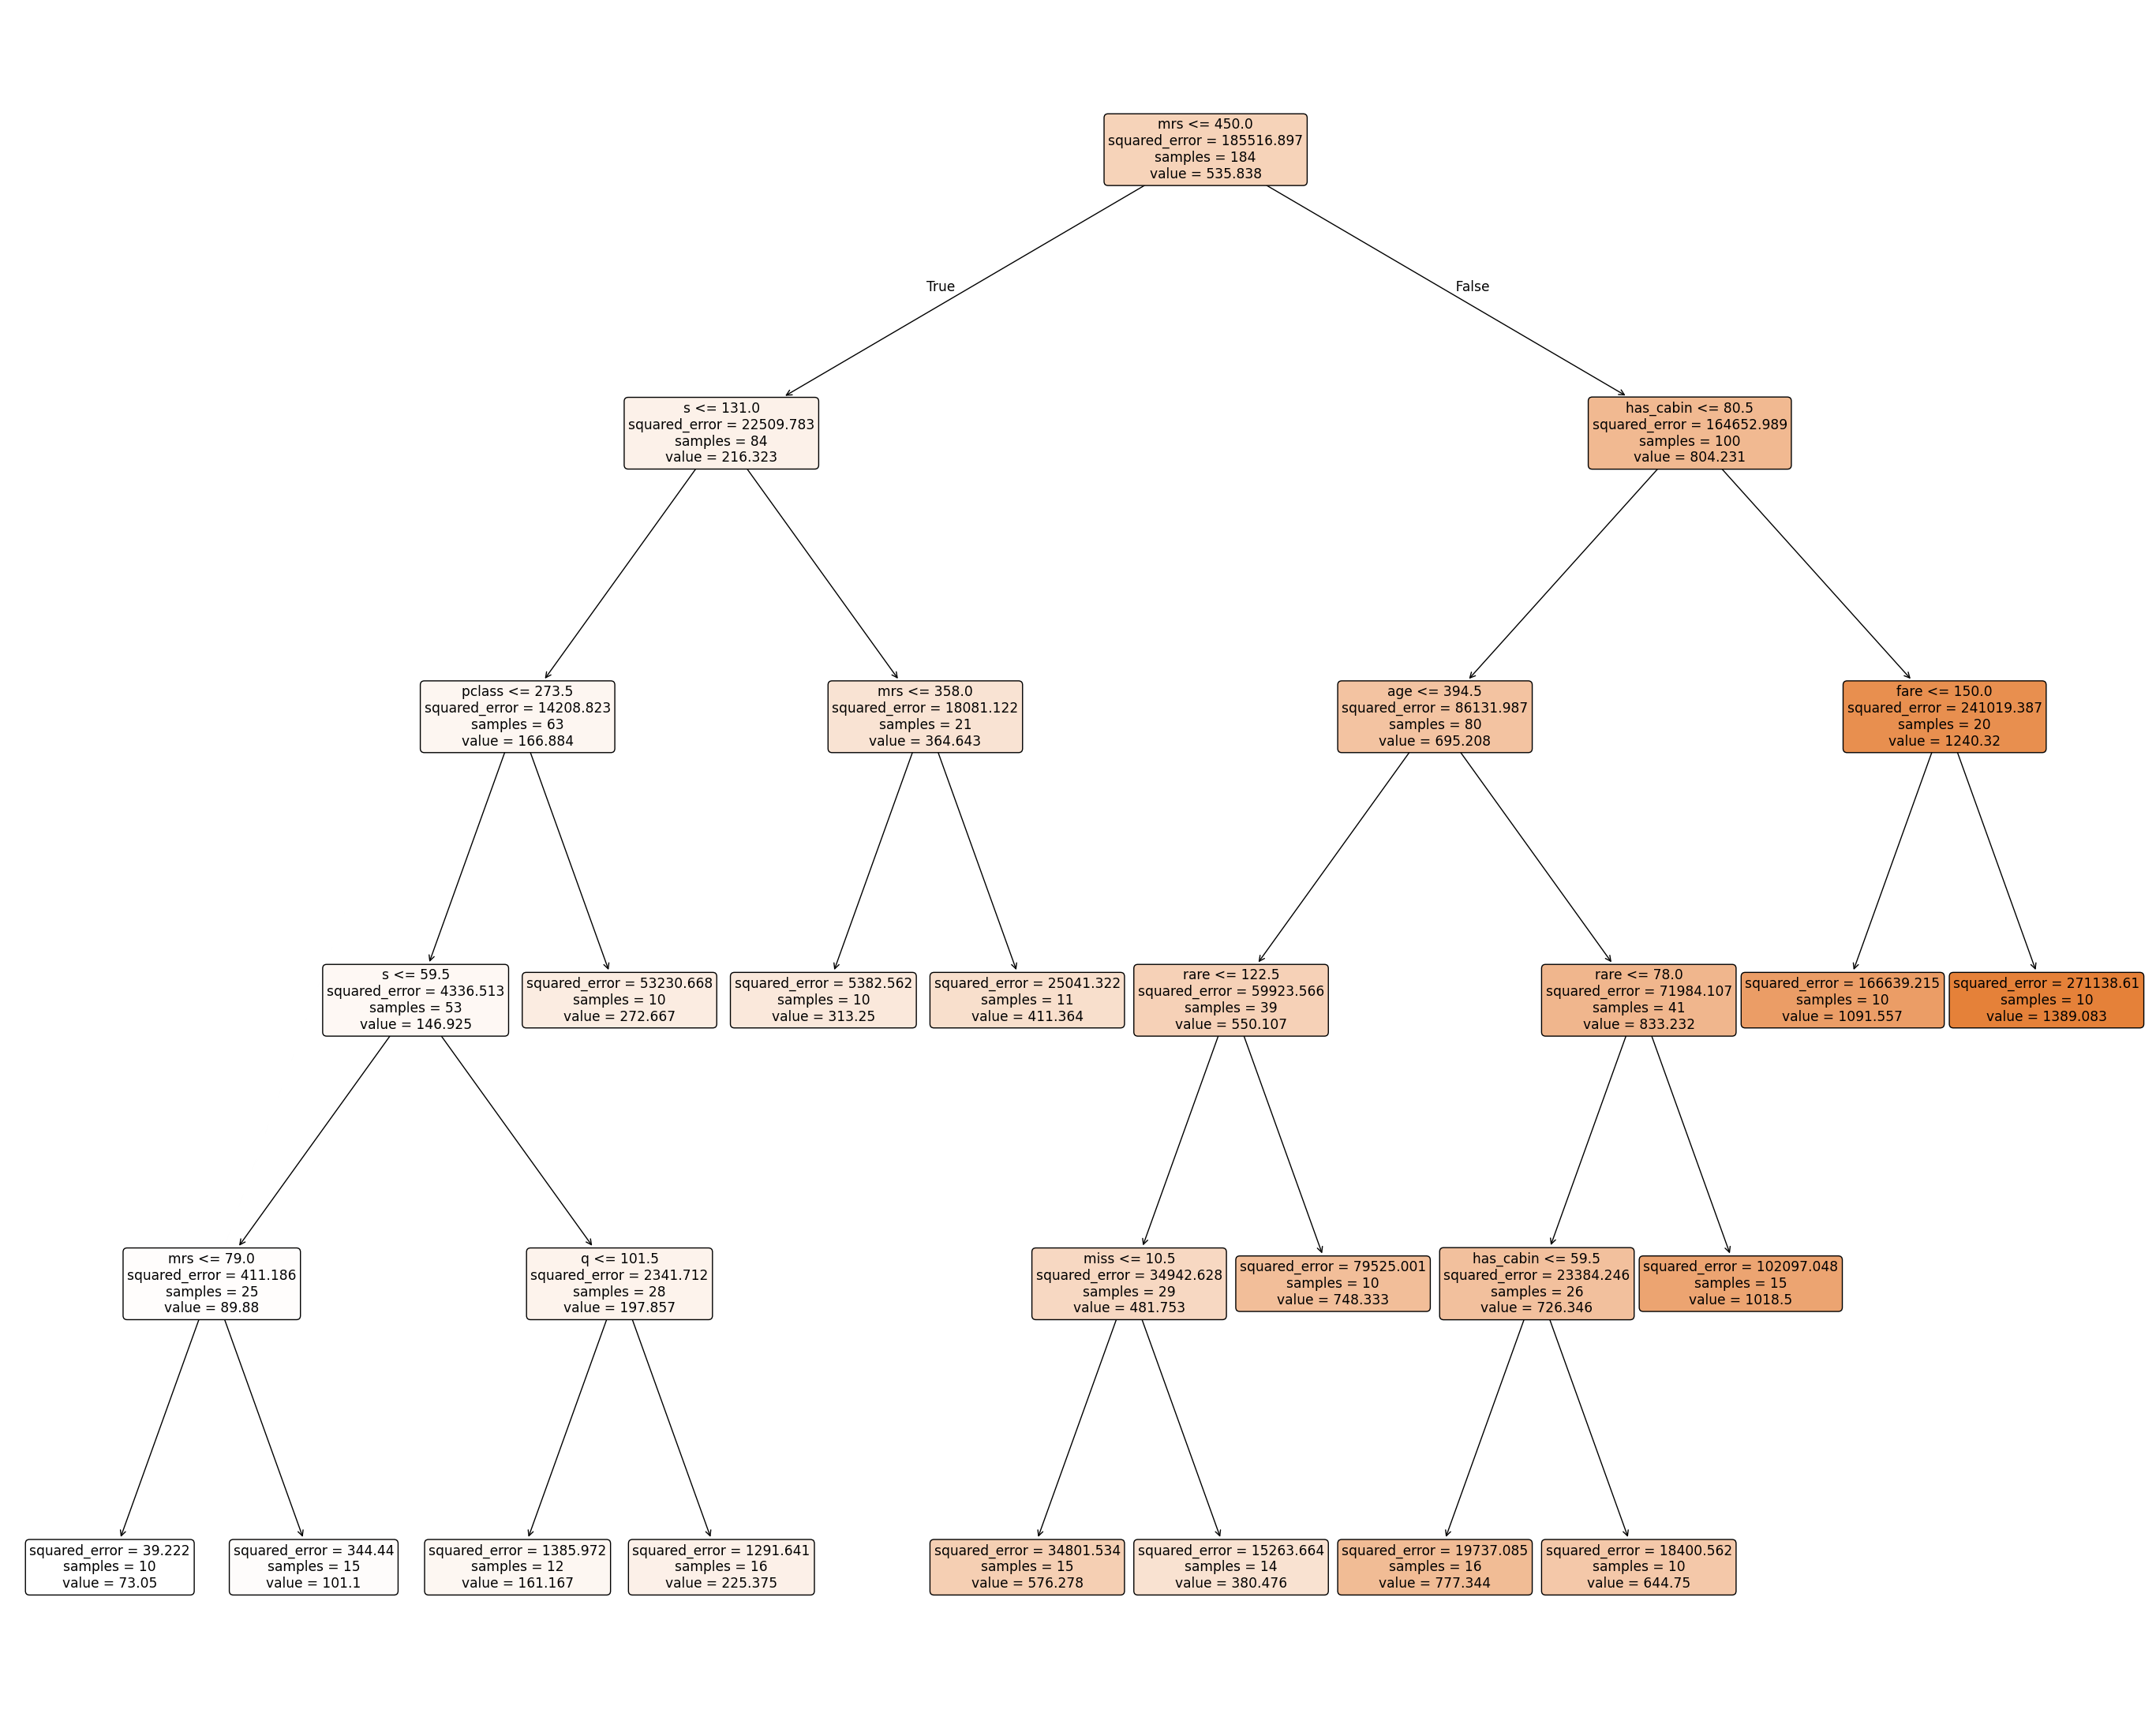

In [172]:
# Gráfico
fig = plt.figure(figsize=(35,28))
graph = plot_tree(best_tree,
                  impurity = True,   #mostrar impurity
                  feature_names = list(train.drop(['survived'], axis=1)),
                  class_names = ['Died', 'Survived'],
                  rounded = True, 
                  filled = True   #colorear los nodos p/ indicar la clase mayoritaria (p/ clasif.)
                 )
fig.savefig("Hitters.pdf",bbox_inches='tight')

Tal vez les parezca un modelo simple, pero tengan en cuenta que con Ridge el MSE de test era Error 116135 y con Lasso 115610. La clase que viene vamos a ver cómo mejorar notablemente la performance de este modelo.